In [ ]:
#The following codes works for extractive summarization of text document
#The main idea behind extractive type of summarization is to pick import words/sentences from the text document there are crucial/important to explain and elobarate the document in reduced form

In [19]:
# I am using the simplist form of text summrization wherein use sentence level extractive type summrization where top N sentences are picked with the help scores assigned by pagerank algorithm with the use of 
# similarity score between pairs of sentences
# Just to elaborate more about the alogirthms and steps here.

## Textrank for extractive text summarization.
1. The entire text in decomposed to sentences with sentence tokenizer and puntuations/special characeters are removed
2. Stop words are removed while vectorizing the sentences to compute pair wise sentence similatities(lowercase sentences)
3. Similarity scores calculations for all pairs are stored in an array and pagerank algorithm is used considering the initial scores of sentences as these similarity scores.
4. pagerank algorithm internally iteratively computes the scores of each sentence and then manually pick top N sentences

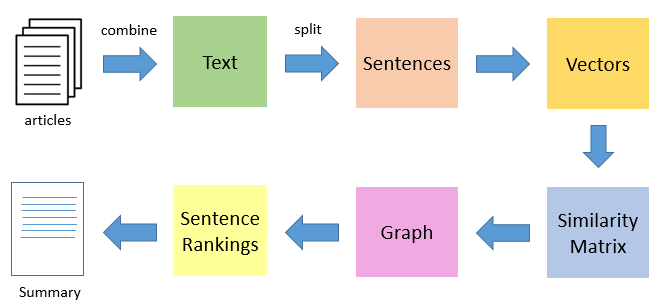

source: https://www.analyticsvidhya.com/blog/2018/11/introduction-text-summarization-textrank-python/

In [44]:
#importing the necessary packages

from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
from nltk.tokenize import sent_tokenize
import numpy as np
import re
import nltk
import networkx as nx

In [42]:
def compute_similarity(sentence_1,sentence_2,stopwords=None):    
  if stopwords is None:        
    stopwords = []        
  sentence_1 = [x.lower() for x in sentence_1]      #Converting the lowercase and appending
  sentence_2 = [x.lower() for x in sentence_2]
  words = list(set(sentence_1 + sentence_2))   #Making the list of all words in both sentences
  a = [0 for _ in range(len(words))]     
  b = [0 for _ in  range(len(words))]             
  for i in sentence_1:        
    if not i in stopwords:
      a[words.index(i)] = 1 + a[words.index(i)]                                                              
  for i in sentence_2:        
    if not i in stopwords:            
      b[words.index(i)] = 1+ b[words.index(i)]            
  return 1-cosine_distance(a,b)   # computes coside distance between two vectors

In [45]:
def pairwise_similarity(sent,stop_words):
  #create an empty similarity matrix
  sm = np.zeros((len(sent),len(sent)))
  for i in range(len(sent)):
      for j in range(len(sent)):
        if i!=j:
          sm[i][j] = compute_similarity(sent[i],sent[j],stop_words)
  return sm

In [16]:
text='WASHINGTON - The Trump administration has ordered the military to start withdrawing roughly 7,000 troops from Afghanistan in the coming months, two defense officials said Thursday, an abrupt shift in the 17-year-old war there and a decision that stunned Afghan officials, who said they had not been briefed on the plans. President Trump made the decision to pull the troops - about half the number the United States has in Afghanistan now - at the same time he decided to pull American forces out of Syria, one official said. The announcement came hours after Jim Mattis, the secretary of defense, said that he would resign from his position at the end of February after disagreeing with the president over his approach to policy in the Middle East. The whirlwind of troop withdrawals and the resignation of Mr. Mattis leave a murky picture for what is next in the United States’ longest war, and they come as Afghanistan has been troubled by spasms of violence afflicting the capital, Kabul, and other important areas.  The United States has also been conducting talks with representatives of the Taliban, in what officials have described as discussions that could lead to formal talks to end the conflict. Senior Afghan officials and Western diplomats in Kabul woke up to the shock of the news on Friday morning, and many of them braced for chaos ahead.  Several Afghan officials, often in the loop on security planning and decision-making, said they had received no indication in recent days that the Americans would pull troops out.  The fear that Mr. Trump might take impulsive actions, however, often loomed in the background of discussions with the United States, they said. They saw the abrupt decision as a further sign that voices from the ground were lacking in the debate over the war and that with Mr. Mattis’s resignation, Afghanistan had lost one of the last influential voices in Washington who channeled the reality of the conflict into the White House’s deliberations. The president long campaigned on bringing troops home, but in 2017, at the request of Mr. Mattis, he begrudgingly pledged an additional 4,000 troops to the Afghan campaign to try to hasten an end to the conflict.'


In [43]:
list_of_sentences =[]  
top_n=3      
list_of_sentences = sent_tokenize(text)    
for sent in list_of_sentences:        
  sent.replace("[^a-zA-Z0-9]"," ")     #removes punctuations
list_of_sentences

['WASHINGTON - The Trump administration has ordered the military to start withdrawing roughly 7,000 troops from Afghanistan in the coming months, two defense officials said Thursday, an abrupt shift in the 17-year-old war there and a decision that stunned Afghan officials, who said they had not been briefed on the plans.',
 'President Trump made the decision to pull the troops - about half the number the United States has in Afghanistan now - at the same time he decided to pull American forces out of Syria, one official said.',
 'The announcement came hours after Jim Mattis, the secretary of defense, said that he would resign from his position at the end of February after disagreeing with the president over his approach to policy in the Middle East.',
 'The whirlwind of troop withdrawals and the resignation of Mr. Mattis leave a murky picture for what is next in the United States’ longest war, and they come as Afghanistan has been troubled by spasms of violence afflicting the capital, 

In [46]:
nltk.download('stopwords')    
nltk.download('punkt')
stop_words = stopwords.words('english')               
sm = pairwise_similarity(list_of_sentences,stop_words)
similarity_graph = nx.from_numpy_array(sm)
scores = nx.pagerank(similarity_graph)
sentence_sorted = sorted(((scores[i],s) for i,s in enumerate(list_of_sentences)),reverse=True) #ranks sentences based on scores computed by pagerank
extract=[]
for i in range(top_n):          # returns the top n sentences where n is the parameter specified
  extract.append(sentence_sorted[i][1])
" ".join(extract)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'The whirlwind of troop withdrawals and the resignation of Mr. Mattis leave a murky picture for what is next in the United States’ longest war, and they come as Afghanistan has been troubled by spasms of violence afflicting the capital, Kabul, and other important areas. They saw the abrupt decision as a further sign that voices from the ground were lacking in the debate over the war and that with Mr. Mattis’s resignation, Afghanistan had lost one of the last influential voices in Washington who channeled the reality of the conflict into the White House’s deliberations. President Trump made the decision to pull the troops - about half the number the United States has in Afghanistan now - at the same time he decided to pull American forces out of Syria, one official said.'